In [2]:
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import random


def genetic_algorithm(total_set, nvar, objective_function, ngen=50, mu=20,
                      lam=40, cxpb=0.7, mutpb=0.2, tournsize=3,
                      verbose=False):
    # Creates a new class name set_mod which is based on the standard python
    # set. This means set_mod is just like set, with the addion of a fitness
    # attribute.
    creator.create("Fitness", base.Fitness, weights=(-1.0,))
    creator.create("Individual", set, fitness=creator.Fitness)
    set_mod = creator.Individual

    def random_samp(size):
        """Function to initlize individual in the population."""
        return set_mod(random.sample(total_set, size))

    def evaluation(individual):
        """Evaluate the objective function."""
        return objective_function(list(individual)),

    def cxSet(ind1, ind2):
        """Apply a crossover operation on two sets."""
        full_set = list(ind1 | ind2)
        ind1 = set_mod(random.sample(full_set, nvar))
        ind2 = set_mod(random.sample(full_set, nvar))
        return ind1, ind2

    def mutSet(individual):
        """Mutation that randomly removes and item and randomly adds an item.
        """
        temp_set = set_mod(random.sample(individual, nvar-1))
        set_to_choose = np.array(list(temp_set ^ total_set))
        new = random.choice(set_to_choose)
        temp_set.add(new)
        return temp_set,

    toolbox = base.Toolbox()

    # set up the population
    toolbox.register("individual", random_samp, nvar)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # set up the GA functions
    toolbox.register("evaluate", evaluation)
    toolbox.register("mate", cxSet)
    toolbox.register("mutate", mutSet)
    # toolbox.register("select", tools.selNSGA2)
    toolbox.register("select", tools.selTournament, tournsize=tournsize)

    # initialize the population
    pop = toolbox.population(n=mu)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    # run the GA
    algorithms.eaMuPlusLambda(pop, toolbox, mu, lam, cxpb, mutpb, ngen, stats,
                              halloffame=hof, verbose=verbose)
    return pop, hof, stats

def read_oscilloscope_csv_old(file_name: str, type: str="tek_tds1012") -> list:
    import csv

    if type == "tek_tds1012":
        raw_x = []
        raw_y = []

        with open(file_name, 'r') as csv_file:
            c = csv.reader(csv_file)

            in_header = True
            for row in c:
                if in_header:
                    if row[0] == 'Record Length':
                        record_length = float(row[1])
                    if row[0] == 'Sample Interval':
                        sample_interval = float(row[1])
                    if row[0] == 'Source':
                        source = str(row[1])
                    if row[0] == 'Vertical Units':
                        vertical_units = str(row[1])
                    if row[0] == 'Vertical Scale':
                        vertical_scale = float(row[1])
                    if row[0] == 'Vertical Offset':
                        vertical_offset = float(row[1])
                    if row[0] == 'Horizontal Units':
                        horizontal_units = str(row[1])
                    if row[0] == 'Horizontal Scale':
                        horizontal_scale = float(row[1])
                    if row[0] == 'Pt Fmt':
                        pt_fmt = str(row[1])
                    if row[0] == 'Yzero':
                        yzero = float(row[1])
                    if row[0] == 'Probe Atten':
                        probe_atten = float(row[1])
                    if row[0] == 'Model Number':
                        model_number = str(row[1])
                    if row[0] == 'Serial Number':
                        serial_number = str(row[1])
                    if row[0] == 'Firmware Version':
                        firmware_version = str(row[1])
                        in_header = False
                else:
                    raw_x.append(float(row[3]))
                    raw_y.append(float(row[4]))

            info_dict = {
                'Record Length': record_length,
                'Sample Interval': sample_interval,
                'Source': source,
                'Vertical Units': vertical_units,
                'Vertical Scale': vertical_scale,
                'Vertical Offset': vertical_offset,
                'Horizontal Units': horizontal_units,
                'Horizontal Scale': horizontal_scale,
                'Pt Fmt': pt_fmt,
                'Yzero': yzero,
                'Probe Atten': probe_atten,
                'Model Number': model_number,
                'Serial Number': serial_number,
                'Firmware Version': firmware_version,
            }

        return np.array(raw_x), np.array(raw_y), info_dict
    
def read_oscilloscope_csv(file_name: str) -> list:
    import csv
    
    with open(file_name, 'r') as csv_file:
        c = csv.reader(csv_file)

        index_CH1 = 1
        index_CH2 = 3
        index_CH3 = 5

        raw_x = []
        raw_y_CH1 = []
        raw_y_CH2 = []
        raw_y_CH3 = []
        probe_atten = [0,0,0]
        vertical_units = ['','','']
        vertical_offset = [0,0,0]
        vertical_scale = [0,0,0]

        in_header = True
        for row in c:
            if row:
                if in_header:
                    if row is []:
                        pass
                    if row[0] == 'Model':
                        model_number = str(row[1])
                    if row[0] == 'Firmware Version':
                        firmware_version = str(row[1])
                    if row[0] == 'Horizontal Units':
                        horizontal_units = str(row[1])
                    if row[0] == 'Horizontal Scale':
                        horizontal_scale = float(row[1])    
                    if row[0] == 'Sample Interval':
                        sample_interval = float(row[1])
                    if row[0] == 'Filter Frequency':
                        sample_interval = float(row[1])
                    if row[0] == 'Record Length':
                        record_length = float(row[1])
                    if row[0] == 'Probe Attenuation':
                        probe_atten[0] = float(row[index_CH1])
                        probe_atten[1] = float(row[index_CH2])
                        probe_atten[2] = float(row[index_CH3])
                    if row[0] == 'Vertical Units':
                        vertical_units[0] = str(row[index_CH1])
                        vertical_units[1] = str(row[index_CH2])
                        vertical_units[2] = str(row[index_CH3])
                    if row[0] == 'Vertical Offset':
                        vertical_offset[0] = float(row[index_CH1])
                        vertical_offset[1] = float(row[index_CH2])
                        vertical_offset[2] = float(row[index_CH3])
                    if row[0] == 'Vertical Scale':
                        vertical_scale[0] = float(row[index_CH1])
                        vertical_scale[1] = float(row[index_CH2])
                        vertical_scale[2] = float(row[index_CH3])
                    if row[0] == 'Label':
                        pass
                    if row[0] == 'TIME':
                        in_header = False
                else:
                    raw_x.append(float(row[0]))
                    raw_y_CH1.append(float(row[index_CH1]))
                    raw_y_CH2.append(float(row[index_CH2]))
                    raw_y_CH3.append(float(row[index_CH3]))

        info_dict = {
            'Record Length': record_length,
            'Sample Interval': sample_interval,
            'Vertical Units': vertical_units,
            'Vertical Scale': vertical_scale,
            'Vertical Offset': vertical_offset,
            'Horizontal Units': horizontal_units,
            'Horizontal Scale': horizontal_scale,
            'Probe Atten': probe_atten,
#             'Model Number': model_number,
            'Firmware Version': firmware_version,
        }
            
        return np.array(raw_x), np.array(raw_y_CH1), np.array(raw_y_CH2), np.array(raw_y_CH3), info_dict
    
def lpf(x, cutoff, fs, order=5):
    """
    low pass filters signal with Butterworth digital
    filter according to cutoff frequency

    filter uses Gustafsson’s method to make sure
    forward-backward filt == backward-forward filt

    Note that edge effects are expected

    Args:
        x      (array): signal data (numpy array)
        cutoff (float): cutoff frequency (Hz)
        fs       (int): sample rate (Hz)
        order    (int): order of filter (default 5)

    Returns:
        filtered (array): low pass filtered data
    """
    from scipy.signal import filtfilt
    from scipy.signal import butter
    import numpy as np
    
    nyquist = fs / 2
    b, a = butter(order, cutoff / nyquist)
    if not np.all(np.abs(np.roots(a)) < 1):
        raise ValueError('Filter with cutoff at {} Hz is unstable given '
                         'sample frequency {} Hz'.format(cutoff, fs))
    filtered = filtfilt(b, a, x, method='gust')
    return filtered 

def downsampling(arr, n):
    import numpy as np
    end =  n * int(len(arr)/n)
    return np.mean(arr[:end].reshape(-1, n), 1)

def reg(xdata, ydata, plot=False, weight=False):
    import matplotlib.pyplot as plt
    if weight:
        w = np.ones(len(ydata)) * 0.1
        w[0] = 1
        w[-1] = 1
        z = np.polyfit(xdata, ydata, 2, w=w)
    else:
        z = np.polyfit(xdata, ydata, 2)

    print(f'z = {z}')

    p = np.poly1d(z)

    if plot:
        plt.figure()
        plt.plot(xdata, ydata, 'b-', label='data')
        plt.plot(xdata, p(xdata), 'r-',)
        #          label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
        plt.legend()
        plt.show()

    print(f'#define a {round(z[2], 13)}f')
    print(f'#define b {round(z[1], 13)}f')
    print(f'#define c {round(z[0], 13)}f')

    return z

def testlin(x, z1, z2, lim_value):
    import numpy as np
    y = np.zeros(len(x))
    
    for i in range(len(x)):
        if x[i] < 32:
            y[i] = 0
        elif x[i] < lim_value:
            y[i] = z1[2] + z1[1] * x[i] + z1[0] * pow(x[i], 2)
        else:
            y[i] = z2[2] + z2[1] * x[i] + z2[0] * pow(x[i], 2)
    
    return y

def quantize(input: np.float, 
             number_of_bits: np.uint,
             max_value: np.float) -> np.float:
    ''' Quantizador de nível '''
    max_bits_value = pow(2, number_of_bits)
    ratio = (max_bits_value) / max_value
    converted = input * ratio
    output = np.ceil(np.clip(converted, 0, max_bits_value)) / ratio
    return output

def get_coeffs(pwlf_, verbose=True) -> np.array:
    '''
    Returns the polynomial coefficients, highest power first. 
    The coefficients for k-th segment are in p[k,:]
    '''
    
    segments = pwlf_.n_segments
    degree = pwlf_.degree
    if verbose:
        print('Number of segments: ', segments)
        print('Polynomial degree: ', degree)
    
    intercept = pwlf_.beta[0]
    breaks = pwlf_.fit_breaks
    beta = np.fliplr(pwlf_.beta[1:].reshape((degree, segments)).T)
    if verbose:
        print(f'beta: \n {beta}')
        print(f'breaks: \n {breaks}')
        print(f'intercept: \n {intercept}')
    
    coefficients = np.zeros((segments, degree+1))
    for segment in range(segments):
        print(f'segment={segment}')
        if degree is 2:
            # coefficient for degree = 2 -> p[:,0]
            coefficients[segment,0] = beta[:segment+1,0].sum()
            
            # coefficient for degree = 1 -> p[:,1]
            coefficients[segment,1] = beta[:segment+1,1].sum() \
                - 2 * np.dot(beta[:segment+1,0],breaks[:segment+1])

            # coefficient for degree = 0 -> p[:,2]
            coefficients[segment,2] = intercept \
                + np.dot(beta[:segment+1,1],(-breaks[:segment+1])**(degree-1)) \
                + np.dot(beta[:segment+1,0],(-breaks[:segment+1])**(degree-0))
            
        elif degree is 3:
            # coefficient for degree = 3 -> p[:,0]
            coefficients[segment,0] = beta[:segment+1,0].sum()
            
            # coefficient for degree = 2 -> p[:,1]
            coefficients[segment,1] = beta[:segment+1,1].sum() \
                    - 3 * np.dot(beta[:segment+1,0],breaks[:segment+1])

            # coefficient for degree = 1 -> p[:,2]
            coefficients[segment,2] = beta[:segment+1,2].sum() \
                    - 2 * np.dot(beta[:segment+1,1],breaks[:segment+1]) \
                    + 3 * np.dot(beta[:segment+1,0],breaks[:segment+1]**2)
            
            # coefficient for degree = 0 -> p[:,3]
            coefficients[segment,3] = intercept \
                    - np.dot(beta[:segment+1,2],breaks[:segment+1]) \
                    + np.dot(beta[:segment+1,1],breaks[:segment+1]**2) \
                    - np.dot(beta[:segment+1,0],breaks[:segment+1]**3)
            
        else:
            print("Error: Not implemented for degree greater than 2.")
            return
        
        alphabet = "abcdefghijklmnopqrstuvwxyz"
        for i in range(len(coefficients[segment,:])):
            print(f'#define {alphabet[i]}{segment} {round(coefficients[segment,i], 13)}f')
                    
    return coefficients

def coeffs_to_list_of_poly1d(coeffs: np.ndarray) -> list:
    p = []
    for coeff in coeffs:
        p.append(np.poly1d(coeff))
    return p

def test_coeffs(x, pwlf_, verbose=False):
    breaks = pwlf_.fit_breaks
    coeffs = get_coeffs(pwlf_)
    segments = pwlf_.n_segments
    polynomials = coeffs_to_list_of_poly1d(coeffs)
    
    y = np.zeros(len(x))
    for segment in range(segments):
        if verbose:
            print(f'segment = {segment}', end='\t')
            print(f'{breaks[segment]} <= x < {breaks[segment+1]}')
            print(polynomials[segment])
        for i in range(len(y)):
            if (x[i] >= breaks[segment]) and (x[i] < breaks[segment+1]):
                y[i] = polynomials[segment](x[i])
    return y

In [3]:
import matplotlib.pyplot as plt
import pwlf

data_file = "sensor1/all.csv"
time, xdata, ydata, _, info_dict = read_oscilloscope_csv(data_file)

adc_average_size = 256

# xdata *= (1024*adc_average_size / 5.021)
xdata *= 1000000000
ydata *= 1000

# Filtering data
cutoff = 1000
fs = info_dict['Sample Interval']
print(f'fs = {fs}')
xdata = lpf(x=xdata, cutoff=cutoff, fs=fs, order=1)
ydata = lpf(x=ydata, cutoff=cutoff, fs=fs, order=1)

# time offset
xdata = xdata[round(len(xdata) * 0.35):round(len(xdata) * 0.60)]
ydata = ydata[round(len(ydata) * 0.35):round(len(ydata) * 0.60)]
time = time[round(len(time) * 0.35):round(len(time) * 0.60)]

# Downsampling
downsampling_factor = 1000
time = downsampling(time, downsampling_factor)
xdata = downsampling(xdata, downsampling_factor)
ydata = downsampling(ydata, downsampling_factor)

# xdata = quantize(xdata, 10, 1023).astype(np.int)

# Plot
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(time, xdata, label='xdata')
plt.legend()
plt.title('ADC Voltage Data From Oscilloscope')
plt.subplot(1, 2, 2)
plt.plot(time, ydata, label='ydata')
plt.legend()
plt.title('Current Data From Oscilloscope')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata)
plt.legend()
plt.xlabel('ydata')
plt.ylabel('xdata')
plt.show()

/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

fs = 100000000.0


<Figure size 2000x1000 with 2 Axes>

No handles with labels found to put in legend.


<Figure size 2000x1000 with 1 Axes>

Number of segments:  1
Polynomial degree:  2
beta: 
 [[-6.25354261e-16  1.74256608e-05]]
breaks: 
 [5.47711060e+07 3.09293863e+09]
intercept: 
 2.381451433104469e-14
segment=0
#define a0 -0.0f
#define b0 1.74941635e-05f
#define c0 -956.2986979786288f


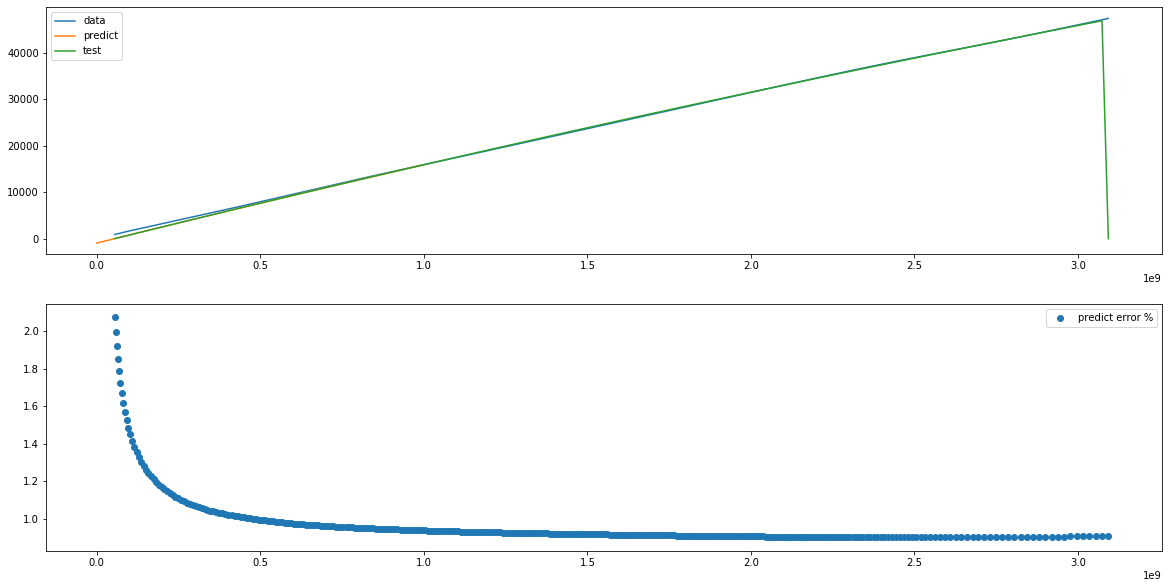

breaks:  [5.47711060e+07 3.09293863e+09]


In [4]:
segments = 2
degree = 2

my_pwlf = pwlf.PiecewiseLinFit(xdata, ydata, degree=degree, disp_res=False)
my_pwlf.use_custom_opt(segments)
total_set = set(np.floor(my_pwlf.x_data))
pop, hof, stats = genetic_algorithm(total_set, my_pwlf.nVar,
                                    my_pwlf.fit_with_breaks_opt, ngen=20,
                                    mu=125, lam=250, cxpb=0.7, mutpb=0.2,
                                    tournsize=5, verbose=False)
x_opt = [np.floor(my_pwlf.x_data.min())]
# x_opt += list(hof[0])
# x_opt.append(34)
x_opt.append(np.floor(my_pwlf.x_data.max()))
ssr = my_pwlf.fit_with_breaks(x_opt)

# predict with integers from dataset minimum to adc maximum (1023*adc_average_size)
xdataHat = np.array(range(0, 1000))*1000000
ydataHat = my_pwlf.predict(xdataHat)
ydataHat_error = (ydata - ydataHat[:len(xdata)]) / ydata

# test getting polynomial coefficients
ydatatest = test_coeffs(xdata, my_pwlf)

# results
plt.figure(figsize=(20,10))
ax1 = plt.subplot(211)
plt.plot(xdata, ydata, label='data')
plt.plot(xdataHat, ydataHat, label='predict')
plt.plot(xdata, ydatatest, label='test')
plt.legend()
ax2 = plt.subplot(212, sharex=ax1)
plt.scatter(xdata, ydataHat_error, label='predict error %')
plt.legend()
plt.show()

print('breaks: ', my_pwlf.fit_breaks)